# k-Nearest Neighbors (k-NN)

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.neighbors import KNeighborsRegressor

Import OSNIR Dataset and shuffle data

In [61]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [62]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the k-Nearest Neighbors Model

In [63]:
model = KNeighborsRegressor(n_neighbors=15, weights='distance')
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [64]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [65]:
OSNIR_est = (model.predict(Input_num))

In [66]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[9.0, 2.0, 100.0, 25.0, 0.0, 9.0] => 14.877405 (expected 14.877405)
[3.0, -3.0, 100.0, 25.0, 0.0, 9.0] => 20.732023 (expected 20.732023)
[8.0, -4.0, 50.0, 25.0, 0.0, 9.0] => 24.221112 (expected 24.221112)
[19.0, 0.0, 10.0, 25.0, 0.0, 15.0] => 19.834469 (expected 19.834469)
[20.0, -2.0, 100.0, 25.0, 0.0, 3.0] => 13.308607 (expected 13.308607)
[4.0, -3.0, 100.0, 25.0, 0.0, 9.0] => 19.483482 (expected 19.483482)
[31.0, -7.0, 100.0, 25.0, 0.0, 9.0] => 7.032914 (expected 7.032914)
[6.0, -3.0, 50.0, 50.0, 0.0, 9.0] => 24.435869 (expected 24.435869)
[27.0, -5.0, 100.0, 25.0, 0.0, 9.0] => 9.513402 (expected 9.513402)
[22.0, -1.0, 100.0, 12.5, 0.0, 9.0] => 11.777534 (expected 11.777534)


In [67]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [68]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_kNN.csv",index=False)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00066689e-03, 3.66788930e-03, 1.26708903e-02, 2.56752251e-02,
        4.73491164e-02, 1.41380460e-01, 7.23574525e-01, 2.06735579e-02,
        5.66855619e-03, 4.66822274e-03, 4.00133378e-03, 1.66722241e-03,
        1.66722241e-03, 1.00033344e-03, 1.33377793e-03, 3.33444481e-04]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

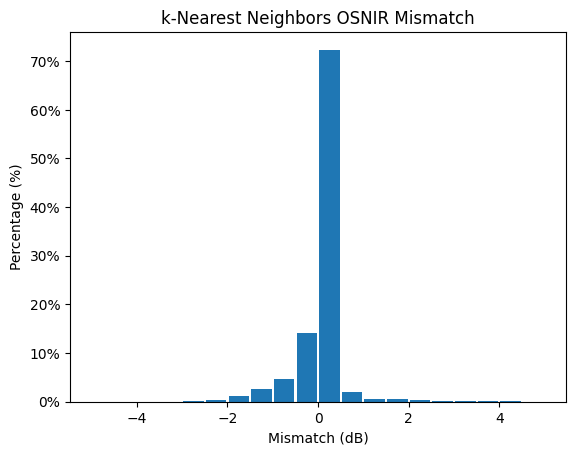

In [69]:
plt.title('k-Nearest Neighbors OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-5,5), rwidth=0.9, bins=20, weights=np.ones(len(Mism))/len(Mism))